In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [2]:
features = pd.read_csv('data/fma_metadata/ts_dataset_Fede.csv',index_col=[0])

features

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,1632.183927,1771.411672,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,2259.879382,2154.652270,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,876.318176,734.271712,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,1003.026523,1060.208594,1165.510394,1179.937534,1204.848490,1252.097967,1154.869517,938.220839,811.355138,968.914624,...,1285.522530,1019.704869,2249.360096,2417.350937,1462.395646,1664.332195,1627.166890,1274.359577,904.175881,917.400646
154307,1389.081601,1476.434972,1989.613482,2258.816403,2213.772148,2161.237663,1987.111802,1803.076069,1539.833243,1490.865631,...,1047.682831,1018.798514,1061.618868,1580.018220,1458.533338,1351.361106,1130.993051,909.549607,792.021082,900.392587
154308,665.567942,716.365239,1036.156199,1431.745363,1327.167596,1048.410409,988.375072,1043.613161,1984.277615,2569.823007,...,2039.086041,1901.681854,1549.024471,1128.349759,929.950885,1035.015037,1106.636831,1066.027888,1001.891145,943.325111


In [3]:
tracks = utils.load('data/fma_metadata/tracks.csv')

In [4]:
tracks=tracks[[('set','subset'),('track','genre_top')]]

In [5]:
TS= pd.merge(tracks, features, left_index=True, right_index=True)
TS.info()

C:\Users\Federico\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Columns: 659 entries, ('set', 'subset') to 656
dtypes: category(2), float64(657)
memory usage: 20.1 MB


In [6]:
TS.head()

,"(set, subset)","(track, genre_top)",0,1,2,3,4,5,6,7,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,small,Hip-Hop,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,small,Hip-Hop,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,small,Experimental,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,small,Rock,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,small,Rock,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442


In [7]:
TS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Columns: 659 entries, ('set', 'subset') to 656
dtypes: category(2), float64(657)
memory usage: 20.1 MB


In [8]:
TS

,"(set, subset)","(track, genre_top)",0,1,2,3,4,5,6,7,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,small,Hip-Hop,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,small,Hip-Hop,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977
148,small,Experimental,854.195714,929.899905,1074.438149,1106.270403,1262.605776,1260.138068,1284.212077,1428.672989,...,1613.198016,1604.099335,1616.798575,1580.397821,1552.878064,1551.043023,1559.632696,1575.169382,1581.174697,1512.527248
182,small,Rock,1935.067371,1944.322028,2033.296617,2056.287808,1980.944183,1920.720428,2093.844116,2219.083104,...,1659.613066,1765.649337,1972.606639,2059.421914,1950.256330,1769.939838,1802.032154,1858.346644,1845.767989,1873.613617
255,small,Rock,1058.040165,1030.117320,1019.887341,994.122747,971.307168,982.655750,1015.293813,919.057637,...,909.310526,787.699413,786.786420,966.045405,1120.767451,1099.290394,1054.891137,995.573291,871.263998,740.037442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,small,Hip-Hop,1003.026523,1060.208594,1165.510394,1179.937534,1204.848490,1252.097967,1154.869517,938.220839,...,1285.522530,1019.704869,2249.360096,2417.350937,1462.395646,1664.332195,1627.166890,1274.359577,904.175881,917.400646
154307,small,Hip-Hop,1389.081601,1476.434972,1989.613482,2258.816403,2213.772148,2161.237663,1987.111802,1803.076069,...,1047.682831,1018.798514,1061.618868,1580.018220,1458.533338,1351.361106,1130.993051,909.549607,792.021082,900.392587
154308,small,Hip-Hop,665.567942,716.365239,1036.156199,1431.745363,1327.167596,1048.410409,988.375072,1043.613161,...,2039.086041,1901.681854,1549.024471,1128.349759,929.950885,1035.015037,1106.636831,1066.027888,1001.891145,943.325111


In [9]:
TS[('set', 'subset')].value_counts()

small     3994
large        0
medium       0
Name: (set, subset), dtype: int64

In [10]:
TS[('track', 'genre_top')].value_counts()

Rock                   999
Experimental           999
Electronic             999
Hip-Hop                997
Spoken                   0
Soul-RnB                 0
Pop                      0
Old-Time / Historic      0
Jazz                     0
International            0
Instrumental             0
Folk                     0
Easy Listening           0
Country                  0
Classical                0
Blues                    0
Name: (track, genre_top), dtype: int64

In [11]:
df=TS.drop([('set','subset'),('track','genre_top')], axis = 1)

In [12]:
Prova=df.iloc[:2]

In [13]:
Prova

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,1753.560229,2257.466861,2882.222974,2670.961118,2111.101477,2032.723377,2203.948417,2010.167976,2087.718374,2048.793779,...,2490.791964,2108.328245,2279.144320,2483.595672,2485.493595,2283.669119,1909.055744,1286.629299,1225.566106,1242.179012
5,1063.952553,1073.580479,929.287077,935.735381,1423.752755,1706.984032,1727.663239,1250.945719,1086.371810,1345.396506,...,1784.380570,1655.845934,1542.638447,1329.698678,1609.129768,1637.752364,1723.875319,1843.045431,1947.498431,1830.323977


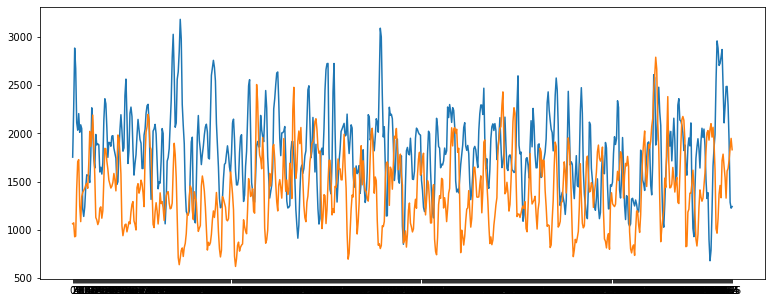

In [14]:
plt.plot(Prova.T)
plt.show()

In [15]:
Prova.values

array([[1753.56022887, 2257.4668613 , 2882.22297418, ..., 1286.62929886,
        1225.56610555, 1242.17901237],
       [1063.95255259, 1073.58047918,  929.28707664, ..., 1843.04543069,
        1947.49843127, 1830.32397681]])

In [16]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1)  # Rescale time series
ts_scaled = scaler.fit_transform(Prova.values)


In [17]:
ts_scaled.shape

(2, 657, 1)

In [18]:
ts_scaled=ts_scaled.squeeze()
ts_scaled.shape

(2, 657)

In [19]:
ts_scaled

array([[-0.13446063,  1.09144306,  2.61134929, ..., -1.27040986,
        -1.41896435, -1.37854848],
       [-0.91559728, -0.89017959, -1.27111365, ...,  1.1412051 ,
         1.41696065,  1.10762051]])

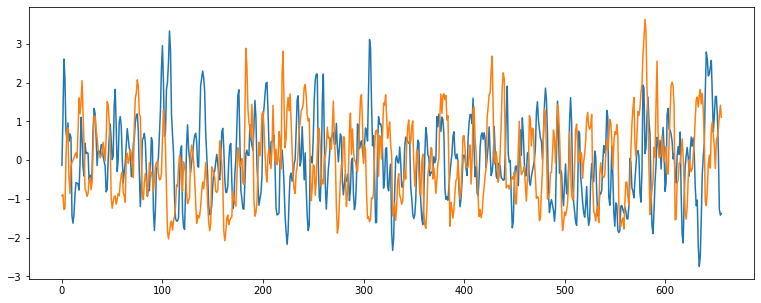

In [20]:
plt.plot(ts_scaled.T)
plt.show()

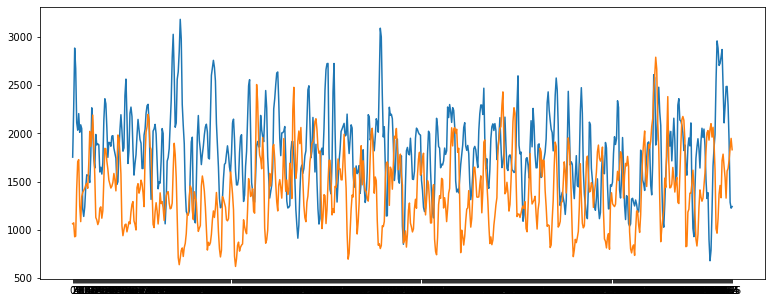

In [21]:
plt.plot(Prova.T)
plt.show()

In [22]:
ts_scaled

array([[-0.13446063,  1.09144306,  2.61134929, ..., -1.27040986,
        -1.41896435, -1.37854848],
       [-0.91559728, -0.89017959, -1.27111365, ...,  1.1412051 ,
         1.41696065,  1.10762051]])

In [23]:
Prova.index

Int64Index([2, 5], dtype='int64', name='track_id')

In [24]:
ts_scaled_Pre_noise = pd.DataFrame(ts_scaled, index =Prova.index,columns=Prova.columns)

In [25]:
ts_scaled_Pre_noise

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621


In [30]:
w = 5
ts_scaled_noise=(ts_scaled_Pre_noise.T).rolling(window=w).mean()
ts_scaled_noise=ts_scaled_noise.T

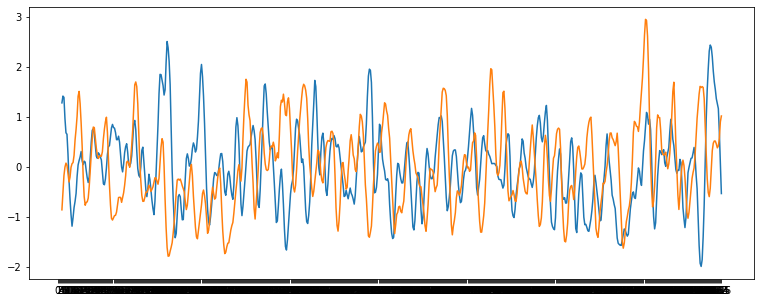

In [31]:
plt.plot(ts_scaled_noise.T)
plt.show()

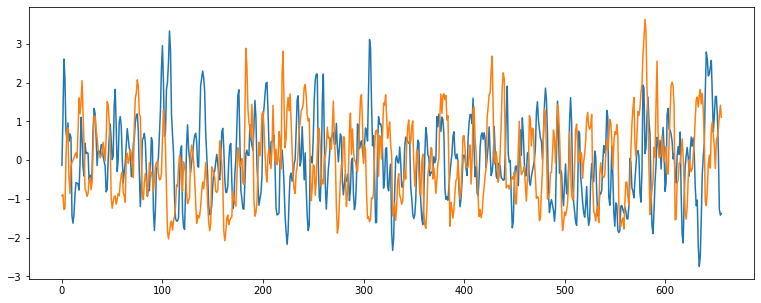

In [32]:
plt.plot(ts_scaled.T)
plt.show()

In [33]:
bbb=ts_scaled_noise.T.rolling(window=10).mean()
bbb

track_id,2,5
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
652,1.910270,0.110565
653,1.830927,0.203441
654,1.667557,0.320538
655,1.430919,0.453349


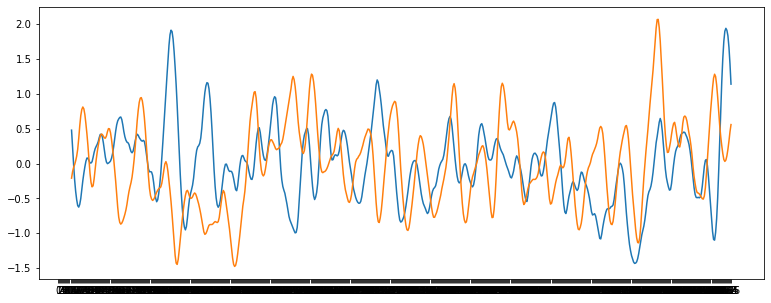

In [34]:
plt.plot(bbb)
plt.show()

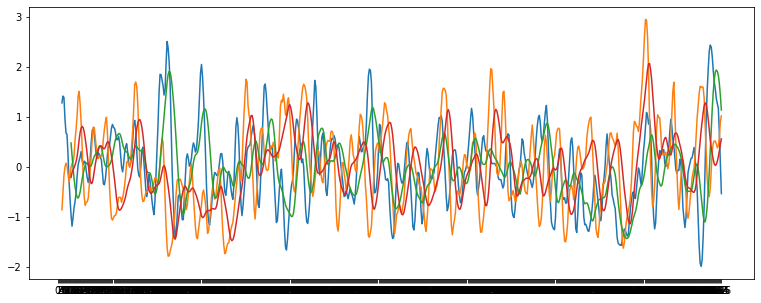

In [35]:
plt.plot(ts_scaled_noise.T)
plt.plot(bbb)

plt.show()

In [36]:
ts_scaled_Trend=ts_scaled_noise.T -(ts_scaled_noise.T).rolling(window=10).mean()
ts_scaled_Trend=ts_scaled_Trend.T
ts_scaled_Trend

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.029077,0.408941,-0.052850,-0.347657,-0.574513,-0.647121,-0.664736,-0.984284,-1.359753,-1.671905
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069690,0.331794,0.459865,0.485656,0.409091,0.270236,0.213279,0.254797,0.448184,0.460147


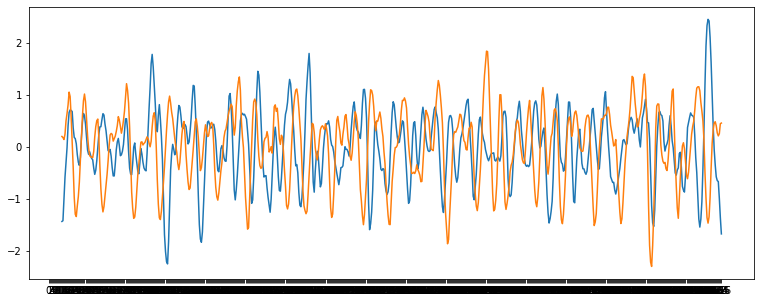

In [37]:
plt.plot(ts_scaled_Trend.T)
plt.show()

In [69]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1)  # Rescale time series
ts_scaled_df = scaler.fit_transform(df.values)


In [70]:
ts_scaled_df=ts_scaled_df.squeeze()
ts_scaled_df.shape

(3994, 657)

In [71]:
ts_scaled_Pre_noise_df = pd.DataFrame(ts_scaled_df, index =df.index,columns=df.columns)
ts_scaled_Pre_noise_df

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,1.257842,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,1.679941,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,-1.260999,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,-1.172778,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,-0.323848,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,2.620067,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [64]:
#w = 5
#ts_scaled_noise_df=(ts_scaled_Pre_noise_df.T).rolling(window=w).mean()
#ts_scaled_noise_df=ts_scaled_noise_df.T
#ts_scaled_noise_df

In [65]:
#ts_scaled_Trend_df=ts_scaled_noise_df.T -(ts_scaled_noise_df.T).rolling(window=10).mean()
#ts_scaled_Trend_df=ts_scaled_Trend_df.T
#ts_scaled_Trend_df

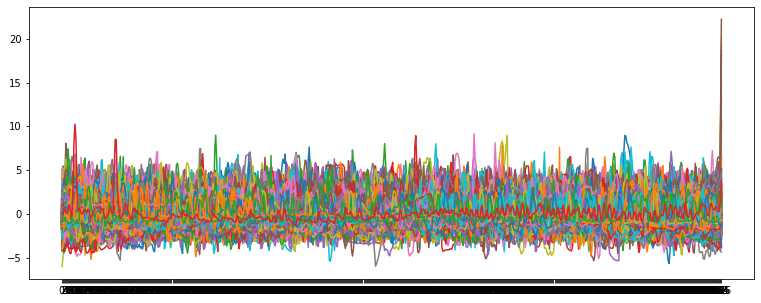

In [66]:
plt.plot(ts_scaled_Pre_noise_df.T)
plt.show()

In [72]:
ts_scaled_Pre_noise_df.to_csv('data/fma_metadata/ts_normal_Fede.csv', index = True)